In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns

/tmp/ipykernel_252908/3138137922.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Wine_dataset.csv')

In [3]:
df.tail(10)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560


In [4]:
df.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [ ]:
sns.pairplot(df,hue='class')

<Axes: xlabel='class', ylabel='count'>

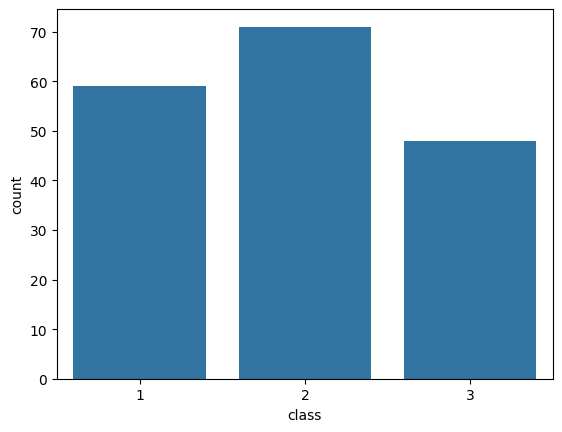

In [5]:
sns.countplot(x='class',data=df)

In [16]:
X = df.drop(columns=['class'])
y = df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



<Axes: >

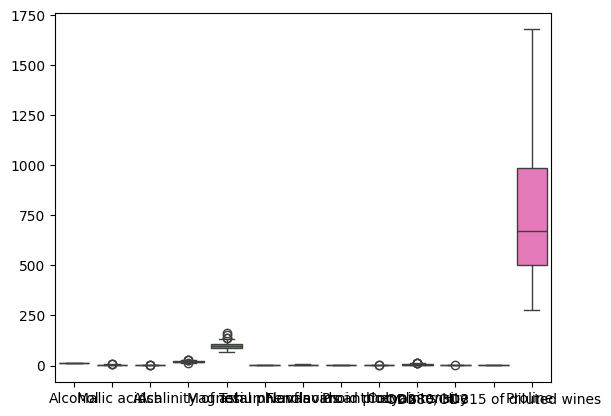

In [17]:
sns.boxplot(X)

In [18]:
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510


In [19]:
id3 = DecisionTreeClassifier(criterion='entropy',random_state=42)
id3.fit(X_train,y_train)
id3

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.4230769230769231, 0.9, 'Flavanoids <= 1.58\nentropy = 1.559\nsamples = 142\nvalue = [43, 60, 39]\nclass = 2'),
 Text(0.15384615384615385, 0.7, 'Color intensity <= 3.825\nentropy = 0.811\nsamples = 52\nvalue = [0, 13, 39]\nclass = 3'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0]\nclass = 2'),
 Text(0.23076923076923078, 0.5, 'Alcalinity of ash <= 17.15\nentropy = 0.169\nsamples = 40\nvalue = [0, 1, 39]\nclass = 3'),
 Text(0.15384615384615385, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 2'),
 Text(0.3076923076923077, 0.3, 'entropy = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = 3'),
 Text(0.6923076923076923, 0.7, 'Proline  <= 724.5\nentropy = 0.999\nsamples = 90\nvalue = [43, 47, 0]\nclass = 2'),
 Text(0.5384615384615384, 0.5, 'Malic acid <= 3.925\nentropy = 0.156\nsamples = 44\nvalue = [1, 43, 0]\nclass = 2'),
 Text(0.46153846153846156, 0.3, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = 2'),
 Text(0.61538461538461

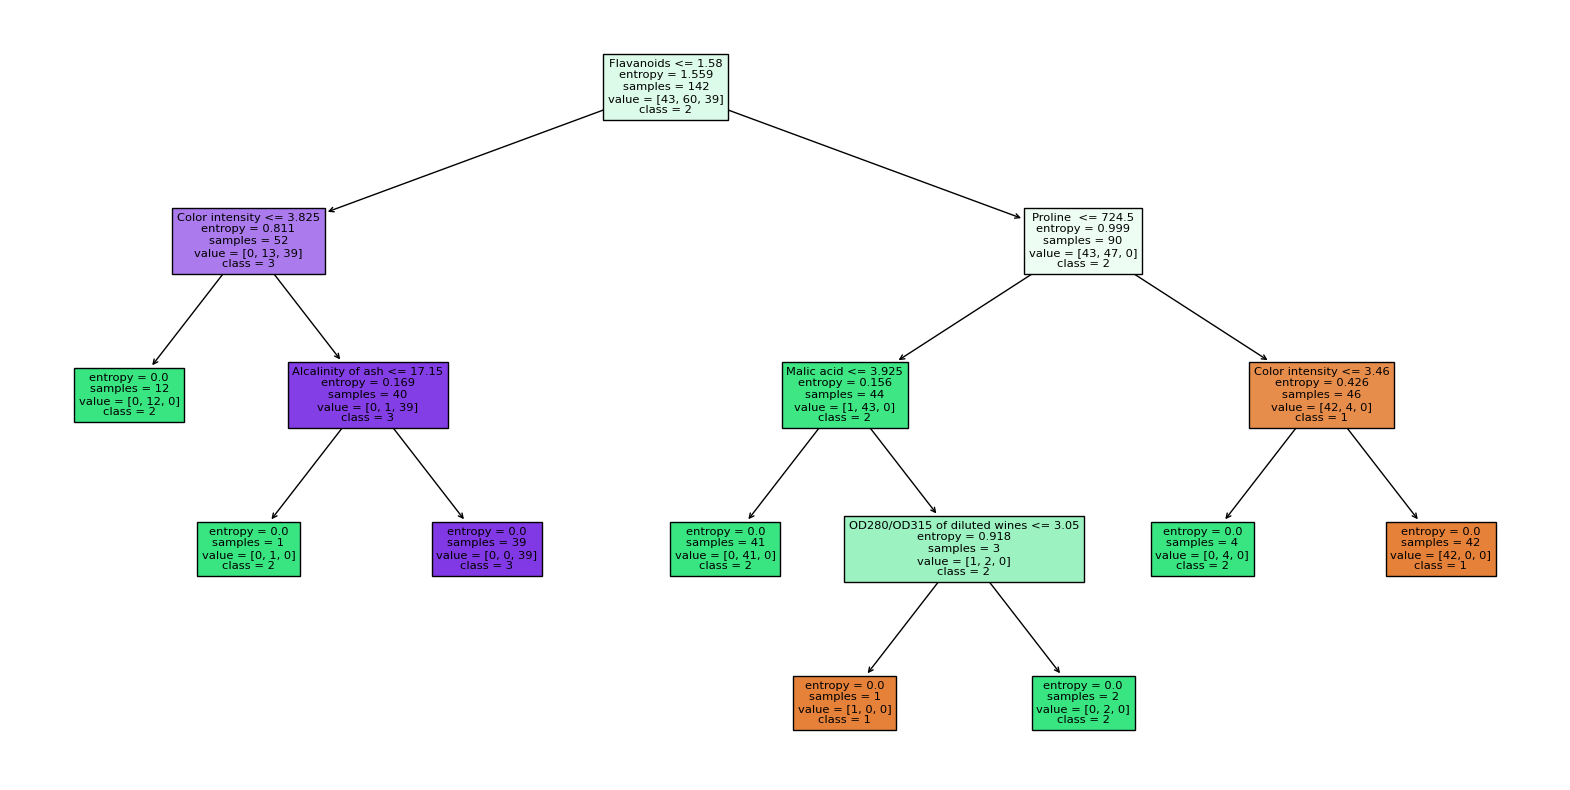

In [20]:
plt.figure(figsize=(20, 10))

plot_tree(id3,feature_names=X_train.columns.tolist(),class_names=['1','2','3'],filled=True)

In [23]:
y_pred_id3 = id3.predict(X_test)

In [27]:
preds = pd.DataFrame({'Actual Class':y_test.values.flatten(),'Predicted Class':y_pred_id3.flatten()})
preds

,Actual Class,Predicted Class
0,2,2
1,1,1
2,1,1
3,2,2
4,2,2
5,1,1
6,3,3
7,1,1
8,3,3
9,3,3


In [29]:
print('Metrics\n')
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
precision_id3 = precision_score(y_test, y_pred_id3, average='weighted')
recall_id3 = recall_score(y_test, y_pred_id3, average='weighted')
f1_id3 = f1_score(y_test, y_pred_id3, average='weighted')
print("Accuracy:", accuracy_id3)
print("Precision:", precision_id3)
print("Recall:", recall_id3)
print("F1 Score:", f1_id3)

Metrics

Accuracy: 0.9722222222222222
Precision: 0.9738562091503269
Recall: 0.9722222222222222
F1 Score: 0.971981721981722


[Text(0.4583333333333333, 0.9, 'Color intensity <= 3.82\ngini = 0.654\nsamples = 142\nvalue = [43, 60, 39]\nclass = 2'),
 Text(0.25, 0.7, 'OD280/OD315 of diluted wines <= 3.695\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]\nclass = 2'),
 Text(0.16666666666666666, 0.5, 'Proline  <= 1002.5\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]\nclass = 2'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]\nclass = 2'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = 1'),
 Text(0.6666666666666666, 0.7, 'Flavanoids <= 1.58\ngini = 0.6\nsamples = 90\nvalue = [40, 11, 39]\nclass = 1'),
 Text(0.5, 0.5, 'Alcalinity of ash <= 17.15\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = 3'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 2'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass

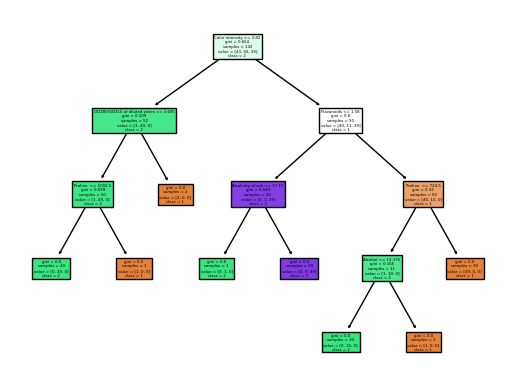

In [31]:
cart = DecisionTreeClassifier(criterion='gini')
cart.fit(X_train,y_train)

plt.figure(figure=(20,10))
plot_tree(cart,feature_names=X_train.columns.tolist(),class_names=['1','2','3'],filled=True)


In [33]:
y_pred_cart = cart.predict(X_test)
cart_pred = pd.DataFrame({'Actual Class':y_test.values.flatten(),'Predicted Class':y_pred_cart.flatten()})
cart_pred

,Actual Class,Predicted Class
0,2,2
1,1,1
2,1,1
3,2,2
4,2,2
5,1,1
6,3,3
7,1,1
8,3,3
9,3,3


In [35]:
# Calculate metrics for CART decision tree
accuracy_cart = accuracy_score(y_test, y_pred_cart)
precision_cart = precision_score(y_test, y_pred_cart, average='weighted')
recall_cart = recall_score(y_test, y_pred_cart, average='weighted')
f1_cart = f1_score(y_test, y_pred_cart, average='weighted')

In [36]:
print("CART Decision Tree Metrics:")
print("Accuracy:", accuracy_cart)
print("Precision:", precision_cart)
print("Recall:", recall_cart)
print("F1 Score:", f1_cart)

CART Decision Tree Metrics:
Accuracy: 0.9722222222222222
Precision: 0.9745370370370369
Recall: 0.9722222222222222
F1 Score: 0.9723780582826866
